# Exploração de dados

Nessa seção, eu explorei a natureza dos dados, como eles podem se comportar com classes separadas de forma linear, não linear, entendendo como elas funcionam e visualizando isso em gráficos. Ao final, foi realizada de forma breve uma manipulação com base no dataset Spaceship Titanic, explorando suas variáveis, a distribuição dos dados e como lidar com algumas observações com dados faltantes. Além disso, explorei também como faria para pré processar os dados visando utilizá-los como entrada em uma rede neural.

## Separação de dados em 2D

Buscando explorar dados primeiramente em apenas duas dimensões, gerei amostras de 100 observações em cada, cujas distribuições eram ditadas pelas seguintes regras:
- **Classe 0:** Mean = $[2, 3]$, Standard Deviation = $[0.8, 2.5]$
- **Classe 1:** Mean = $[5, 6]$, Standard Deviation = $[1.2, 1.9]$
- **Classe 2:** Mean = $[8, 1]$, Standard Deviation = $[0.9, 0.9]$
- **Classe 3:** Mean = $[15, 4]$, Standard Deviation = $[0.5, 2.0]$

Para isso, utilizei uma das bibliotecas mais clássicas do Python, NumPy, para gerar cada uma das classes, com a sua respectiva distribuição. Tendo em vista a replicabilidade desse estudo, eu utilizei uma *RANDOM SEED (42)*.

In [2]:
import numpy as np
RANDOM_SEED = 42
N = 100

classes = [0, 1, 2, 3]

X_mean = [2, 5, 8, 15]
Y_mean = [3, 6, 1, 4]

X_sd = [0.8, 1.2, 0.9, 0.5]
Y_sd = [2.5, 1.9, 0.9, 2.0]
label_x = []
label_y = []
label_class = []
np.random.seed(RANDOM_SEED)
for classe in classes:
    x = np.random.normal(loc=X_mean[classe], scale=X_sd[classe], size=N)
    y = np.random.normal(loc=Y_mean[classe], scale=Y_sd[classe], size=N)
    
    label_x.append(x)
    label_y.append(y)
    label_class.append([classe] * N)        

Utilizando a biblioteca Matplotlib.PyPlot para visualizar como ficaram as distribuições de cada uma das classes, podemos observar algo como.

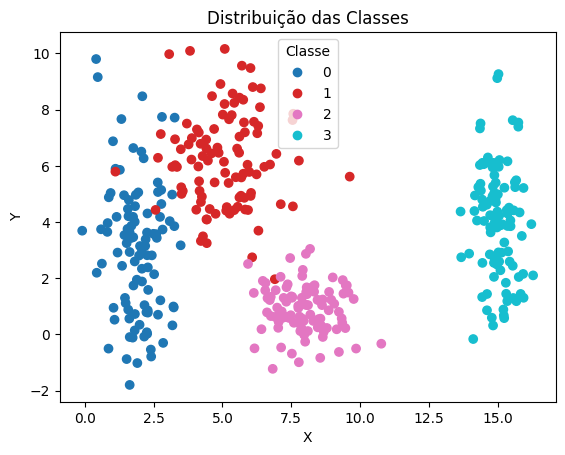

In [3]:
import matplotlib.pyplot as plt
scatter = plt.scatter(label_x, label_y, c=label_class, cmap='tab10')

plt.title('Distribuição das Classes')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(*scatter.legend_elements(), title="Classe")
plt.show()

Em geral o que podemos perceber dessos dados é que as quatro classes possuem uma distribuição compacta, exceto a classe 1 que é um pouco mais esparsa. Por exemplo, a classe 3 está claramente definida entre valores de X próximo de 15 e Y variando entre 0 e 10, se distanciando bastante das outras classes. A classe 0 também tem mais ou menos o mesmo comportamento da classe 3, porém em níveis de valor entre 2 e 2.5 de X. Já a classe 1, se apresenta como a mais distinta entre as classes, sendo mais esparsa e gerando bastante sobreposição entre seus pontos e os pontos das classes 0 e 2.

Simulando possíveis limites lineares entre os pontos, é possível dizer que algumas linhas retas poderiam separar as quatro classes. A classe 3 se apresenta facilmente como candidata a ser separada por uma única linha, que em conjunto com outra linha poderia separar a classe 2. O problema aqui mesmo, ficou nas classes 0 e 1, em que alguns pontos se sobrepuseram, causando uma dificuldade em separar as classes com apenas uma linha reta. É possível tentarmos separar com a reta, porém é bastante provável que isso gere alguns erros de classificação.

Eu desenhei algumas linhas que podem de certa forma, simular a separação das classes com resoluções lineares

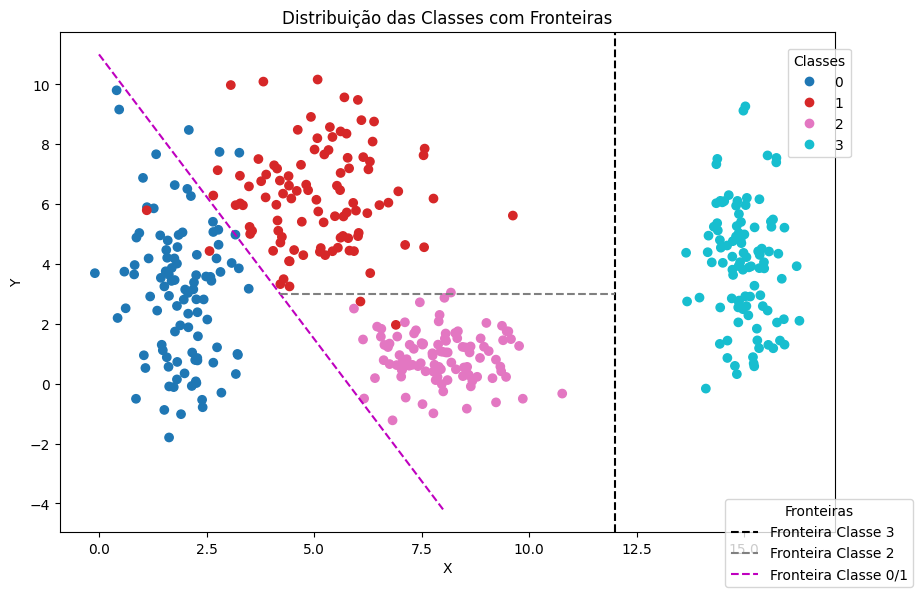

In [1]:
fig, ax = plt.subplots(figsize=(10, 6.5))

scatter = ax.scatter(label_x, label_y, c=label_class, cmap='tab10')

# x = 12
fronteira3 = ax.axvline(x=12, color='k', linestyle='--', label='Fronteira Classe 3')

# -1.9x + 11
x_vals = np.linspace(0, 8, 200)
y_vals = -1.9 * x_vals + 11
fronteira01, = ax.plot(x_vals, y_vals, 'm--', label='Fronteira Classe 0/1')

# y=3 x = [4.2, 12]
x_intersec = (11 - 3) / 1.9
x_left = max(x_intersec, 0)
x_right = 12
fronteira2, = ax.plot([x_left, x_right], [3, 3], linestyle='--', color='gray',
                      label='Fronteira Classe 2')

ax.set_title('Distribuição das Classes com Fronteiras')
ax.set_xlabel('X')
ax.set_ylabel('Y')

leg_classes = ax.legend(*scatter.legend_elements(), title="Classes",
                        loc="upper center", bbox_to_anchor=(0.98, 0.98))
ax.add_artist(leg_classes)

ax.legend(handles=[fronteira3, fronteira2, fronteira01], title="Fronteiras",
          loc="upper center", bbox_to_anchor=(0.98, 0.08))

plt.show()
